In [1]:
import pandas as pd
import numpy as np

In [2]:
datos = pd.read_csv("../Descriptores moleculares/df_final.csv")

In [3]:
datos["BCUT2D_MWHI"].fillna(datos["BCUT2D_MWHI"].mean(), inplace=True)

C:\Users\Eliud\AppData\Local\Temp\ipykernel_4832\1269603426.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos["BCUT2D_MWHI"].fillna(datos["BCUT2D_MWHI"].mean(), inplace=True)


# Algoritmo RF con PCA y rejilla
<hr>

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [5]:
X = datos.drop(columns=["SMILES", "BBB+/BBB-", "mol"]).copy()
y = datos["BBB+/BBB-"].copy()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
pipe = Pipeline([
    ('pca', PCA(n_components=20)),
    ('rf', RandomForestClassifier())
])

In [8]:
param_grid = {
    'rf__n_estimators': [10, 20, 50, 100, 200],  # Número de árboles en el bosque
    'rf__max_depth': [50, 100, 150, 200, 250],  # Profundidad máxima de los árboles
    'rf__max_features': ['sqrt'],  # Número de características a considerar en cada división,
    'rf__criterion': ['gini', 'entropy']
}

In [104]:
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=10)

In [105]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(max_depth=60))]),
             n_jobs=10,
             param_grid={'rf__criterion': ['gini', 'entropy'],
                         'rf__max_depth': [50, 100, 150, 200, 250],
                         'rf__max_features': ['sqrt'],
                         'rf__n_estimators': [10, 20, 50, 100, 200]},
             scoring='accuracy', verbose=2)

In [106]:
grid_search.best_params_

{'rf__criterion': 'gini',
 'rf__max_depth': 50,
 'rf__max_features': 'sqrt',
 'rf__n_estimators': 100}

In [107]:
grid_search.best_score_

0.8803843074459567

In [9]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(max_depth=50, max_features="sqrt", n_estimators=100, criterion="gini"))
])

In [10]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestClassifier(max_depth=50))])

In [11]:
y_predicha = pipe.predict(X_test)

In [12]:
#Calcular estadísticos
accuracy = accuracy_score(y_test, y_predicha)
recall = recall_score(y_test, y_predicha, average='weighted')
precision = precision_score(y_test, y_predicha, average='weighted')
f1 = f1_score(y_test, y_predicha, average='weighted')
print("Accuracy", round(accuracy, 5))
print("Recall", round(recall, 5))
print("precision", round(precision,5))
print("f1", round(f1,5))

Accuracy 0.87324
Recall 0.87324
precision 0.87229
f1 0.87208


In [13]:
y_entrenamiento = pipe.predict(X_train)

In [14]:
accuracy = accuracy_score(y_train, y_entrenamiento)
recall = recall_score(y_train, y_entrenamiento, average='weighted')
precision = precision_score(y_entrenamiento, y_entrenamiento, average='weighted')
f1 = f1_score(y_train, y_entrenamiento, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.983
Recall 0.983
precision 1.0
f1 0.983


In [15]:
# Obtener el estimador final del pipeline
rf_estimator = pipe.named_steps['rf']

# Obtener las importancias de las características
importances = rf_estimator.feature_importances_


In [16]:
importances

array([0.06841987, 0.07917925, 0.06006085, 0.03592526, 0.05744703,
       0.03830731, 0.04136388, 0.03231444, 0.02833796, 0.03016733,
       0.02948497, 0.0182608 , 0.02247363, 0.03366898, 0.02811772,
       0.02235709, 0.02480173, 0.02011082, 0.01921904, 0.01950509,
       0.01653727, 0.02294348, 0.01785248, 0.01862084, 0.01687892,
       0.01537739, 0.01069269, 0.01633305, 0.018983  , 0.01508524,
       0.01484439, 0.01361604, 0.01678742, 0.01902322, 0.01167669,
       0.01435313, 0.01236821, 0.01850349])

In [17]:
importancia_df = pd.concat((pd.Series(X.columns, name="Caracteristica"), pd.Series(importances, name="Valor")), axis=1)

In [18]:
importancia_ordenada = importancia_df.sort_values(by="Valor", ascending=False)

In [19]:
importancia_ordenada

,Caracteristica,Valor
1,PEOE_VSA10,0.079179
0,PEOE_VSA1,0.068420
2,MolLogP,0.060061
4,VSA_EState3,0.057447
6,VSA_EState5,0.041364
5,MolWt,0.038307
3,fr_Al_COO,0.035925
13,SMR_VSA10,0.033669
7,Kappa3,0.032314
9,PEOE_VSA9,0.030167


In [20]:
import matplotlib.pyplot as plt

In [21]:
norm = plt.Normalize(min(importancia_ordenada["Valor"]), max(importancia_ordenada["Valor"]))
colors = plt.cm.viridis(norm(importancia_ordenada["Valor"]))

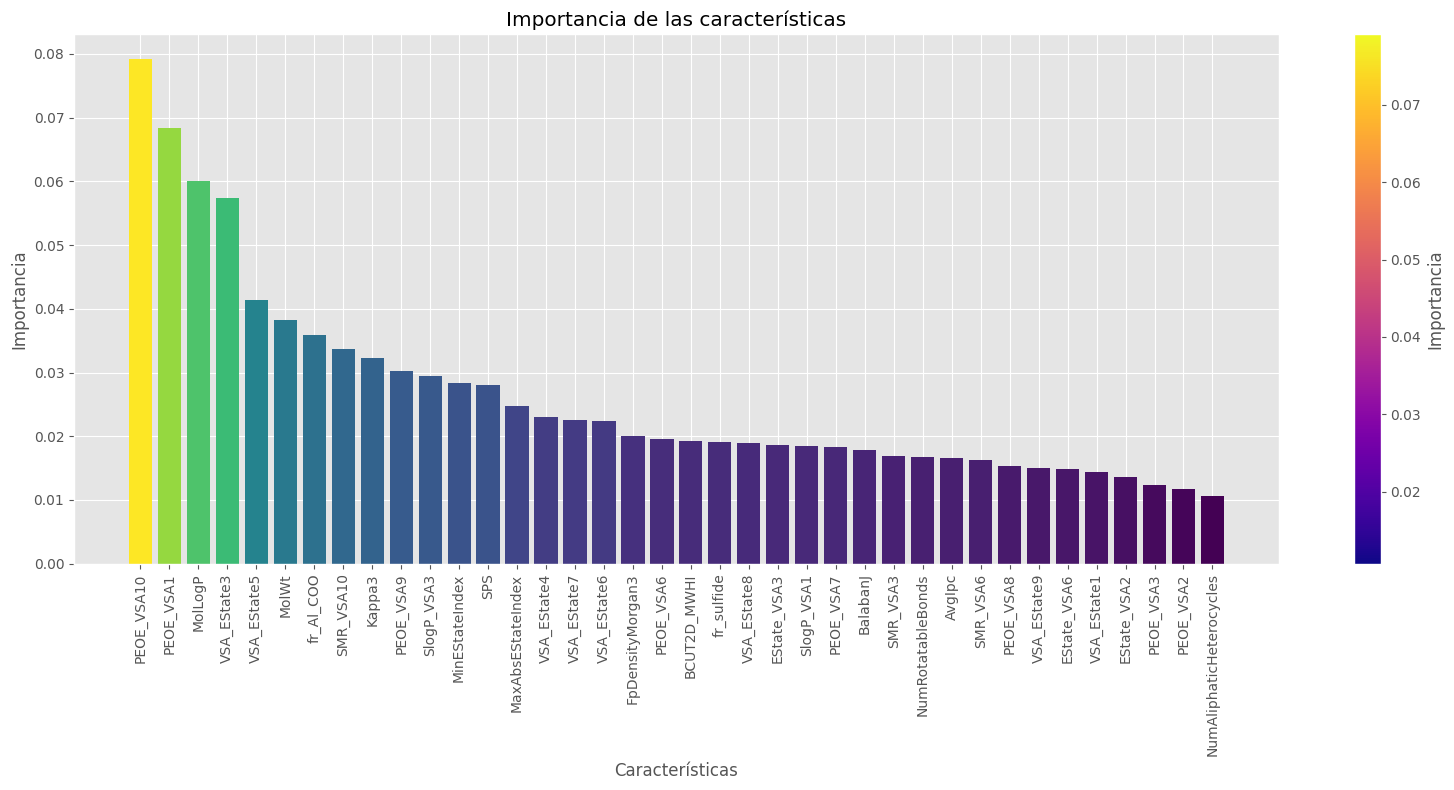

In [22]:
# Crear la figura y el gráfico de barras
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(16, 8))

bars = ax.bar(importancia_ordenada["Caracteristica"], importancia_ordenada["Valor"], color=colors)

# Personalización opcional
ax.set_xlabel('Características')
ax.set_ylabel('Importancia')
ax.set_title('Importancia de las características')
plt.xticks(rotation=90)

# Barra de color para mostrar el colormap
sm = plt.cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Importancia')

# Mostrar gráfico
plt.tight_layout()
plt.savefig('Importancia de las características.png')
plt.show()

In [23]:
from sklearn.metrics import confusion_matrix

In [25]:
mat = confusion_matrix(y_predicha, y_test)

In [26]:
import seaborn as sns

In [33]:
y_test.shape

(1562,)

<Axes: >

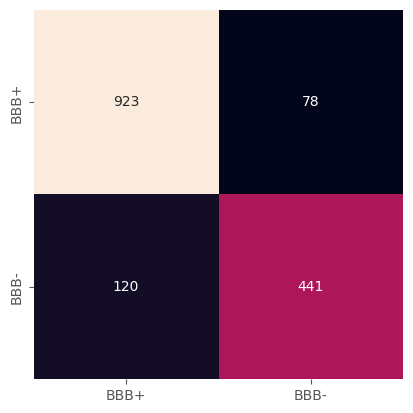

In [32]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar = False, xticklabels=datos["BBB+/BBB-"].value_counts().index, yticklabels=datos["BBB+/BBB-"].value_counts().index)

In [34]:
y_serie = pd.Series(y_test, name="Y_entrenamiento")

In [35]:
y_predicha_serie = pd.Series(y_predicha, name="Y_predicha", index=y_serie.index)

In [36]:
y_resultados = pd.concat((y_predicha_serie, y_serie), axis=1)

In [37]:
y_resultados

,Y_predicha,Y_entrenamiento
3961,BBB+,BBB+
7381,BBB-,BBB-
6095,BBB+,BBB+
586,BBB+,BBB+
5628,BBB+,BBB-
...,...,...
5216,BBB+,BBB+
5065,BBB-,BBB-
1729,BBB+,BBB+
4463,BBB+,BBB+


In [38]:
def clasificar_resultado(row):
    if row["Y_predicha"] == "BBB+" and row["Y_entrenamiento"] == "BBB+":
        return "VP"  # Verdadero Positivo
    elif row["Y_predicha"] == "BBB+" and row["Y_entrenamiento"] == "BBB-":
        return "FP"  # Falso Positivo
    elif row["Y_predicha"] == "BBB-" and row["Y_entrenamiento"] == "BBB+":
        return "FN"  # Falso Negativo
    elif row["Y_predicha"] == "BBB-" and row["Y_entrenamiento"] == "BBB-":
        return "VN"  # Verdadero Negativo

In [39]:
y_resultados["Resultado"] = y_resultados.apply(clasificar_resultado, axis=1)

In [40]:
y_resultados

,Y_predicha,Y_entrenamiento,Resultado
3961,BBB+,BBB+,VP
7381,BBB-,BBB-,VN
6095,BBB+,BBB+,VP
586,BBB+,BBB+,VP
5628,BBB+,BBB-,FP
...,...,...,...
5216,BBB+,BBB+,VP
5065,BBB-,BBB-,VN
1729,BBB+,BBB+,VP
4463,BBB+,BBB+,VP


In [41]:
FP_RF = y_resultados[y_resultados["Resultado"] == "FP"]

In [42]:
FP_RF.shape

(120, 3)

In [43]:
FN_RF = y_resultados[y_resultados["Resultado"] == "FN"]

In [45]:
FN_RF.shape

(78, 3)

In [46]:
FP_RF.to_csv("FP_RF.csv")

In [47]:
FN_RF.to_csv("FN_RF.csv")